### 1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Import the necessary libraries

In [2]:
import pandas as pd 
import numpy as np 

from sklearn import metrics
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import seaborn as sns

#### `load_digits()` returns a dataset that contains different digits represented in array images

In [3]:
digits = load_digits()

### digits is a dictionary

In [4]:
# Target --> integers from 0 to 9
digits.target[:55]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2])

In [5]:
print('"digits" keys:\n\n', digits.keys())

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)

# 16 == absolute white
# 0 == absolute black
print("\nImage Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0–9)
print("\nLabel Data Shape", digits.target.shape)

"digits" keys:

 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Image Data Shape (1797, 64)

Label Data Shape (1797,)


In [6]:
df = pd.DataFrame(data=np.c_[digits.data, digits.target])

In [7]:
df.columns

RangeIndex(start=0, stop=65, step=1)

In [8]:
# Resize the DataFrame to get the 2 labels
new_df = df.iloc[[1, 9]]

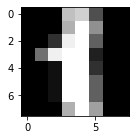

In [9]:
plt.figure(figsize=(20,2))


one = new_df.iloc[0]
k = np.reshape(one[:64].values, (8,8))
plt.imshow(k, cmap=plt.cm.gray)



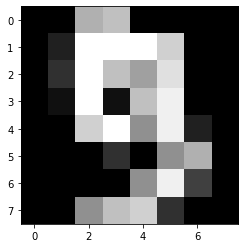

In [10]:
nine = new_df.iloc[1]
k = np.reshape(nine[:64].values, (8,8))
plt.imshow(k, cmap=plt.cm.gray)

### Splitting the Data into Training and Test Sets (Digits Dataset)

In [11]:
# X --> Feature
X = digits.data
# y --> Target
y = digits.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 99)
print(X.shape)
print(y.shape)
print('-----')
print(X_train.shape)
print(y_train.shape)
print('-----')
print(X_test.shape)
print(y_test.shape)

(1797, 64)
(1797,)
-----
(1437, 64)
(1437,)
-----
(360, 64)
(360,)


### Assign `LogisticRegression()` to a variable

In [13]:
log_reg = linear_model.LogisticRegression(n_jobs=-1)

In [14]:
# Apply .fit() to the training set
log_reg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

## Predict X_test

In [19]:
y_pred = log_reg.predict(X_test)

#Let's see the predictions for the first 5 digits
y_pred[:5]

array([8, 8, 0, 5, 3])

## Check the score over the train set


In [20]:
print('This is the model score with the train data:\n' + str((log_reg.score(X_train, y_train) * 100)) + '%')

This is the model score with the train data:
100.0%


### Now, repeat the process on the test set

In [21]:
print('This is the model score with the test data:\n' + str((log_reg.score(X_test, y_test) * 100)) + '%')

This is the model score with the test data:
97.77777777777777%


## As we can see, now the score is almost 1 within the test set

In [26]:
score = log_reg.score(X_test, y_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Here, just a few values were incorrect, but almost all of them were predicted correctly

Text(0.5, 1.0, 'Accuracy Score: 0.9777777777777777')

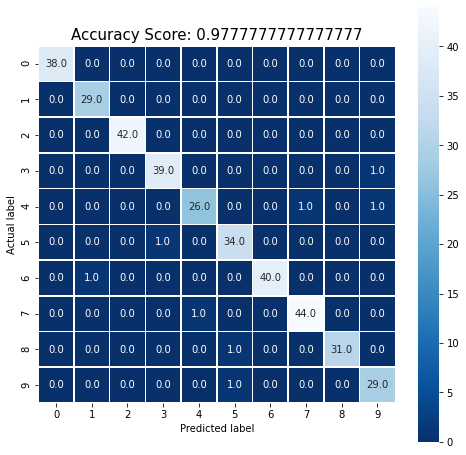

In [27]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [35]:
# Now that my model is working properly:

# 1. I will train my model with all the available data

log_reg.fit(X,y)

#Predict with all the data
y_pred = log_reg.predict(X)

# Calculate the score with all available data
log_reg.score(X, y)

1.0